<a href="https://colab.research.google.com/github/Harshithakulal238/Miniproject_Bioshield/blob/main/BioSheild.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!python --version

Python 3.12.12


In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [13]:
from google.colab import files
uploaded = files.upload()


Saving datasets4.zip to datasets4.zip


In [14]:
# 1️⃣ Unzip into a folder named 'plants_dataset'
!unzip -q datasets4.zip -d plants_dataset

# 2️⃣ Check extracted folders/files
!ls plants_dataset


Chromolaena_odorata  Lantana_camara


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

data_dir = "plants_dataset"   # folder where you unzipped your dataset
img_size = (180, 180)
batch_size = 32



In [17]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)


Found 399 files belonging to 2 classes.
Using 320 files for training.
Found 399 files belonging to 2 classes.
Using 79 files for validation.


In [18]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [20]:
# Recreate dataset if needed
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# ✅ Get class names here (before prefetching)
class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# Then prepare for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 399 files belonging to 2 classes.
Using 320 files for training.
Found 399 files belonging to 2 classes.
Using 79 files for validation.
Classes: ['Chromolaena_odorata', 'Lantana_camara']


In [21]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", seed=123),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])


In [22]:
model = keras.Sequential([
    data_augmentation,  # 👈 augmentation added
    layers.Rescaling(1./255, input_shape=img_size + (3,)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [24]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.5422 - loss: 0.9645 - val_accuracy: 0.5316 - val_loss: 0.6674
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.5881 - loss: 0.6153 - val_accuracy: 0.6962 - val_loss: 0.5387
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.7904 - loss: 0.5382 - val_accuracy: 0.7089 - val_loss: 0.5253
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.7490 - loss: 0.5423 - val_accuracy: 0.7215 - val_loss: 0.4929
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.7882 - loss: 0.4812 - val_accuracy: 0.7342 - val_loss: 0.5524
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.7804 - loss: 0.4856 - val_accuracy: 0.7215 - val_loss: 0.5033
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.7867 - loss: 0.4627 - val_accuracy: 0.7215 - val_loss: 0.4786
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.7724 - loss: 0.4931 - val_accuracy: 0.7342 - val_loss:

In [25]:
loss, acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {acc*100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 464ms/step - accuracy: 0.7162 - loss: 0.4866
Validation Accuracy: 72.15%


In [27]:
model.save("invasive_plants_model.keras")



In [28]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load trained model
model = load_model("invasive_plants_model.keras")

# Show the class names again (from training)
print("Class labels:", class_names)


Class labels: ['Chromolaena_odorata', 'Lantana_camara']


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [29]:
from google.colab import files
uploaded = files.upload()


Saving 321849821_582124526.jpg to 321849821_582124526.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


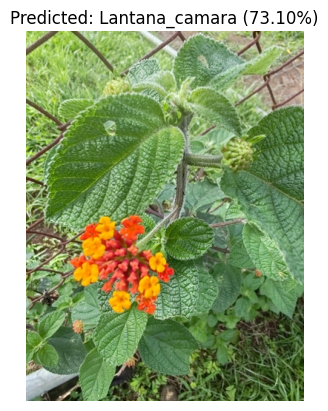

In [30]:
import PIL

# Get the uploaded file name
for filename in uploaded.keys():
    img_path = filename

# Load and preprocess image
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # add batch dimension

# Prediction
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)

# Show result
plt.imshow(PIL.Image.open(img_path))
plt.axis('off')
plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
plt.show()
